 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("C:/Users/Marius23a/GWU-ARL-FIN-PT-09-2020-U-C/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
whale_return = whale_df.isnull().sum()
print(whale_return)

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("/Users/Marius23a/GWU-ARL-FIN-PT-09-2020-U-C/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_df.isnull().sum()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Drop nulls
algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [ ]:
# Check Data Types
sp500_history_csv.dtypes

In [13]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype(str).str.replace("$","")
sp500_df["Close"] = sp500_df["Close"].astype("float")
print(sp500_df)

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]


In [16]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
#sp500_returns.sort_index (inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename Column
sp500_returns = sp500_returns.rename(columns={"Close": "sp500"})
sp500_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

In [ ]:
# Plot daily returns
all_returns = all_prices.pct_change()
all_returns.head()

In [ ]:
# Plot cumulative returns
cumulative_returns = (1 + sp500_history_returns).cumprod()
cumulative_returns.head()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:xlabel='Date'>

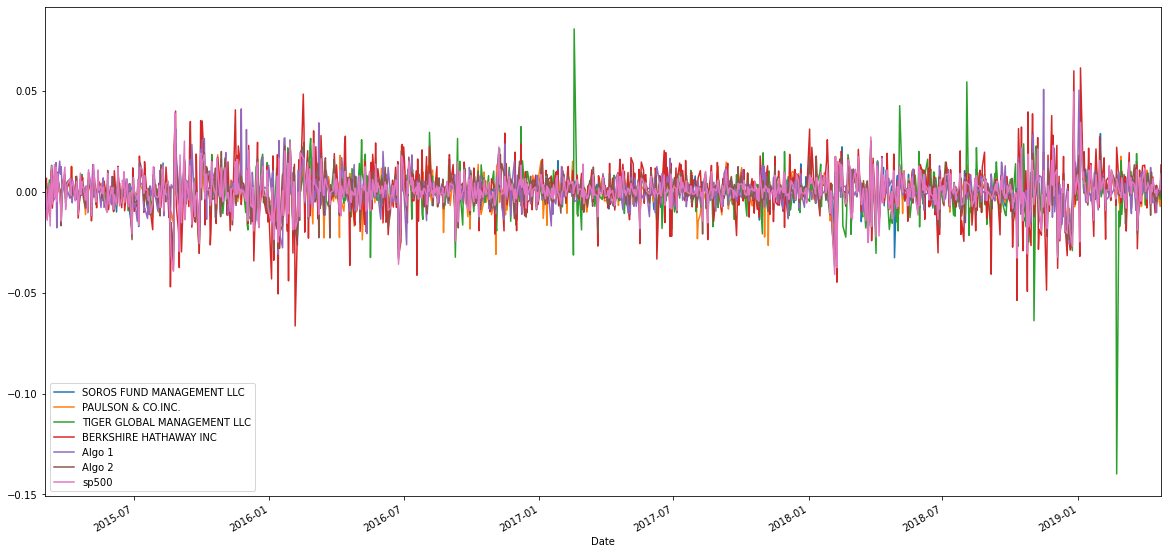

In [22]:
# Box plot to visually show risk
combined_df.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

<AxesSubplot:xlabel='Date'>

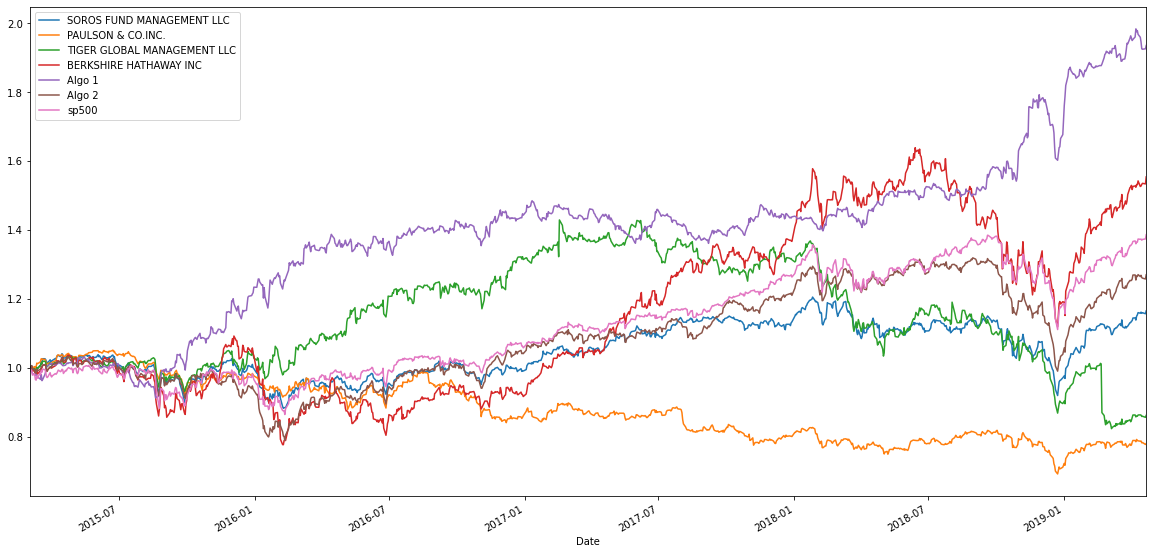

In [23]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
#cumulative_returns.head()
cumulative_returns.plot( kind='line', xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

<AxesSubplot:>

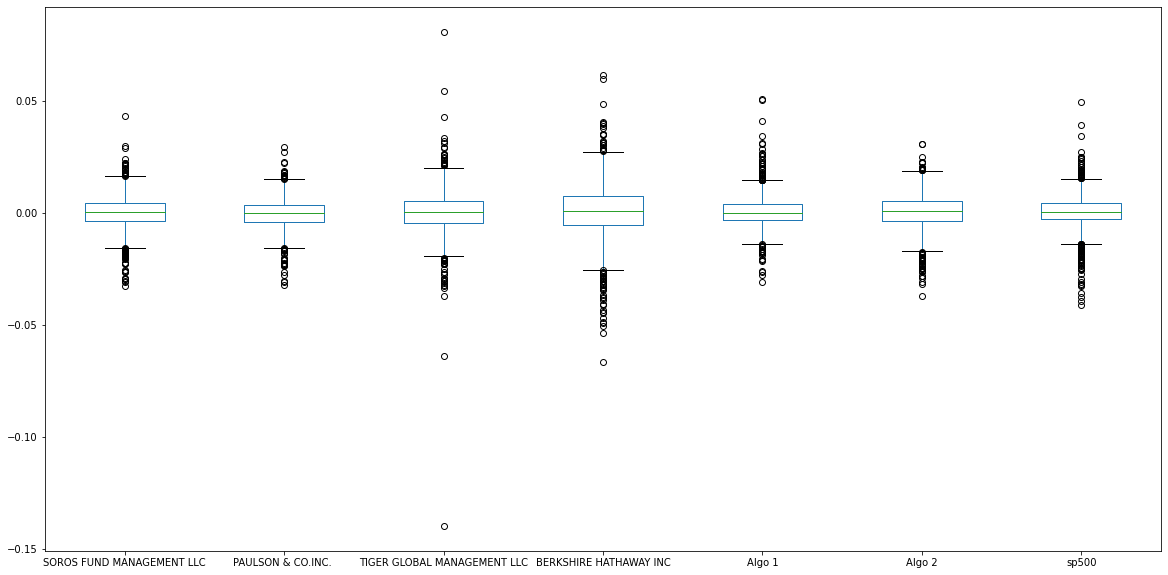

In [24]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot(kind='box', figsize=(20,10))

In [25]:
# Daily Standard Deviations
daily_std = combined_df.std()
daily_std
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

In [27]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk = combined_df["sp500"].std()
daily_std > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

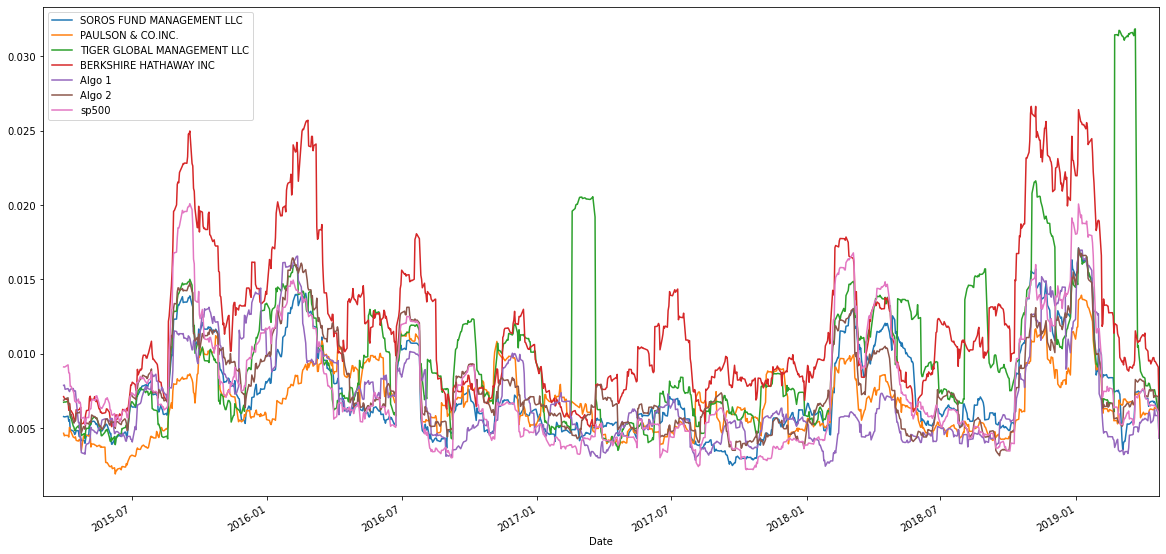

In [29]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

In [30]:
# Construct a correlation table
correlation = combined_df.corr()
correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:xlabel='Date'>

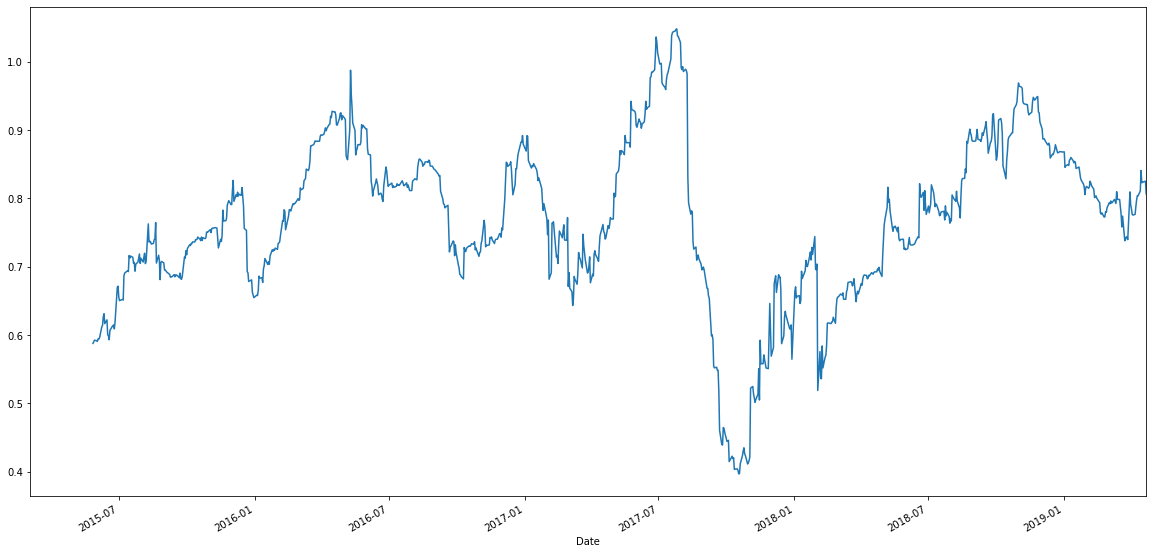

In [31]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(60).cov(combined_df['sp500'])
variance_soros = combined_df['sp500'].rolling(60).var()
beta_soros = covariance_soros/variance_soros
beta_soros.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

<AxesSubplot:xlabel='Date'>

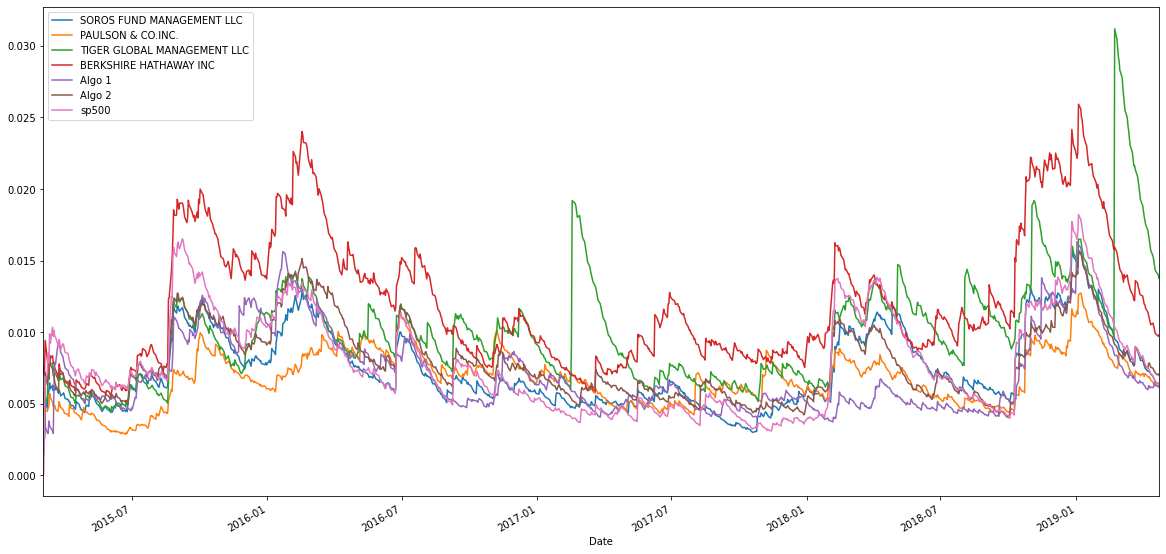

In [32]:
# Calculate a rolling window using the exponentially weighted moving average. 
ewm_soros = combined_df.ewm(21).std()
ewm_soros.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [33]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

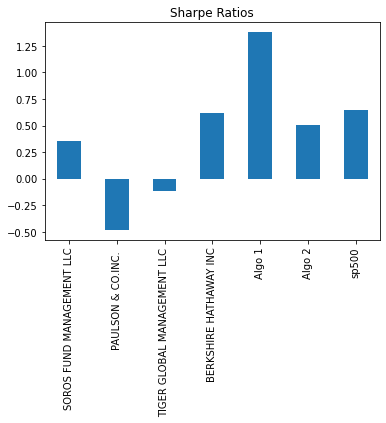

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Read the first stock
AAl_historic_csv = Path("Resources/AAL_historic.csv")
aal_df = pd.read_csv(AAl_historic_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
# aal_df = aal_df.rename(columns={"Close": "aal"})
aal_df["Symbol"] = "AAL"
aal_df.reset_index(inplace=True)
aal_df["Date"] = aal_df["Date"].dt.date
aal_df.set_index("Date", inplace=True)
aal_df = aal_df.sort_index()
aal_df.head()

In [41]:
# Read the second stock
DAL_historic_csv = Path("Resources/DAL_historic.csv")
dal_df = pd.read_csv(DAL_historic_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
# dal_df = dal_df.rename(columns={"Close": "dal"})
dal_df["Symbol"] = "DAL"
dal_df.reset_index(inplace=True)
dal_df["Date"] = dal_df["Date"].dt.date
dal_df.set_index("Date", inplace=True)
dal_df = dal_df.sort_index()
dal_df.head()

In [ ]:
# Read the third stock
LUV_historic_csv = Path("Resources/LUV_historic.csv")
luv_df = pd.read_csv(LUV_historic_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)
# luv_df = luv_df.rename(columns={"Close": "luv"})
luv_df["Symbol"] = "LUV"
luv_df.reset_index(inplace=True)
luv_df["Date"] = luv_df["Date"].dt.date
luv_df.set_index("Date", inplace=True)
luv_df = luv_df.sort_index()
luv_df.head()

In [43]:
# Concatenate all stocks into a single DataFrame
combined_data = pd.concat([aal_df, dal_df, luv_df], axis="rows", join="inner")
combined_data.tail()

In [ ]:
# Reset the index
combined_data.reset_index(inplace=True)
combined_data.head()

In [ ]:
# Pivot so that each column of prices represents a unique symbol
pivoted_data = combined_data.pivot_table(values="Close", index="Date", columns="Symbol")
pivoted_data.head()

In [ ]:
# Drop Nulls
daily_returns = pivoted_data.pct_change().dropna()
daily_returns.head(

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
custom_df = pd.concat([whale_df, algo_df, sp500_returns, portfolio_returns], axis="columns", join="inner")
custom_df.head()

In [ ]:
custom_df["Custom"] = custom_df[0]
custom_df = custom_df.drop(columns=[0], axis="columns", errors="ignore")
custom_df.head()

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_df.dropna().head()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
custom_std = custom_df.std()
custom_std

In [ ]:
my_risk = custom_df["sp500"].std()
custom_std > my_risk

In [ ]:
custom_annualized_std = custom_std * np.sqrt(252)
custom_annualized_std

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [ ]:
# Rolling
sp500_history_csv_df.rolling(window=21).std().plot()

In [ ]:
# Annualized Sharpe Ratios
custom_sharpe_ratios = (custom_df.mean() * 252) / (custom_df.std() * np.sqrt(252))
custom_sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
# Create a correlation analysis
custom_correlation = custom_df.corr()
custom_correlation.style.background_gradient()

In [ ]:
# Beta
csv_data_beta = covariance / variance
csv_data_beta